# Selecting Right Threshold Values Using ROC Curve

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [6]:
X, y= make_classification(n_samples=2000, weights= [1,1], random_state=1)

In [7]:
X.shape

(2000, 20)

In [8]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=1)

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Random Forests

In [28]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
ytrain_pred

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       ...,
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.31, 0.69]])

In [29]:
ytest_pred= rf_model.predict_proba(X_test)
print(f'RF train roc-auc {roc_auc_score( y_train, ytrain_pred[:, 1])}')
print(f'RF test roc-auc: {roc_auc_score(y_test, ytest_pred[:, 1])}')

RF train roc-auc 1.0
RF test roc-auc: 0.9831111111111112


# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
ytest_pred = log_classifier.predict_proba(X_test)
print(f'LR train roc-auc {roc_auc_score( y_train, ytrain_pred[:, 1])}')
print(f'LR test roc-auc: {roc_auc_score(y_test, ytest_pred[:, 1])}')

LR train roc-auc 0.9863589331232614
LR test roc-auc: 0.9885777777777777


# Adaboost Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
ytest_pred = ada_classifier.predict_proba(X_test)
print(f'AB train roc-auc {roc_auc_score( y_train, ytrain_pred[:, 1])}')
print(f'AB test roc-auc: {roc_auc_score(y_test, ytest_pred[:, 1])}')

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AB train roc-auc 0.9975081174960356
AB test roc-auc: 0.9826111111111111


# KNN classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
ytest_pred = knn_classifier.predict_proba(X_test)
print(f'KNN train roc-auc {roc_auc_score( y_train, ytrain_pred[:, 1])}')
print(f'KNN test roc-auc: {roc_auc_score(y_test, ytest_pred[:, 1])}')

KNN train roc-auc 0.981670071491109
KNN test roc-auc: 0.9426111111111111


# Now we will focus on selecting the best threshold for maximum accuracy

In [43]:
pred= []
for model in [rf_model, log_classifier, ada_classifier, knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))
pd.concat(pred, axis=1)

Ensemble test roc-auc: 0.9848555555555556


,0,1,2,3
0,0.98,0.991873,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.96,0.966763,0.538202,0.8
3,0.91,0.761896,0.509875,0.8
4,0.60,0.779209,0.490344,0.4
...,...,...,...,...
595,0.00,0.024263,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,1.00,0.984400,0.532403,1.0
598,0.03,0.001157,0.441720,0.2


In [45]:
final_prediction= pd.concat(pred, axis=1).mean(axis=1)
final_prediction

0      0.882765
1      0.115823
2      0.816241
3      0.745443
4      0.567388
         ...   
595    0.121346
596    0.117845
597    0.879201
598    0.168219
599    0.834858
Length: 600, dtype: float64

# Calculate the ROC curve

In [47]:
fpr, tpr, thresholds= roc_curve(y_test, final_prediction)
thresholds

array([       inf, 0.91373186, 0.90174666, 0.90077496, 0.80046059,
       0.79909566, 0.79811172, 0.79806746, 0.78171221, 0.78077862,
       0.74544265, 0.74536546, 0.734354  , 0.73383029, 0.697555  ,
       0.69639901, 0.68647534, 0.66743002, 0.61002889, 0.60233761,
       0.5922633 , 0.58547279, 0.58233772, 0.57641408, 0.55086694,
       0.53645421, 0.52829258, 0.52724303, 0.45992251, 0.45866162,
       0.44199699, 0.37657193, 0.3763691 , 0.34940676, 0.34585998,
       0.24450327, 0.24127731, 0.23467325, 0.23397529, 0.20121042,
       0.20101676, 0.11784501, 0.11783511, 0.10748954])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_ls= []
for thres in thresholds:
    y_pred= np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize= True))
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls                   

,thresholds,accuracy
29,0.458662,0.961667
30,0.441997,0.961667
28,0.459923,0.960000
27,0.527243,0.958333
25,0.536454,0.956667
24,0.550867,0.956667
26,0.528293,0.956667
31,0.376572,0.946667
32,0.376369,0.945000
23,0.576414,0.945000


In [52]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

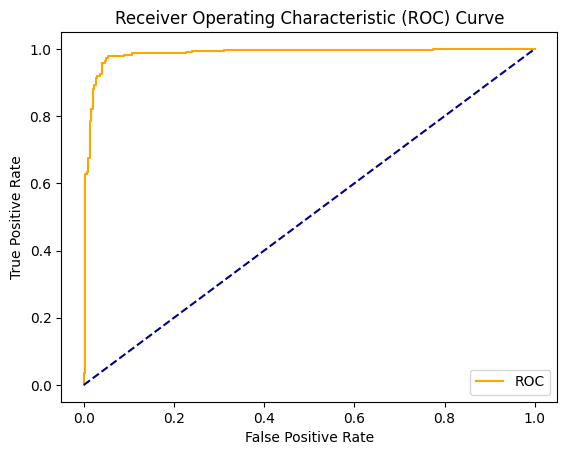

In [53]:
plot_roc_curve(fpr, tpr)